# DataCube Library Project

This notebook offers a step-by-step interactive tutorial on how use the Python DataCube library in this repository.

## Install Prerequisites

There are several prerequisites needed to run this library. Installing is easy. Simply run the following command in your shell. If you would like to see the list of requirements, please check the requirements.txt file.

In [ ]:
pip install -r requirements.txt

## Using the Library

Several sample executions will now be shown, showing the capabilities of the library.

### Example 1

After importing the necessary libraries and classes, a dbc (DatabaseConnection) object is intialized. This same dbc will be used for all subsequent Datacubes. The creation of a Datacube is demonstrated; for this example, a coverage that returns an image is used. The last 5 lines show how you can display these results using Matplotlib.

In [ ]:
import sys
sys.path.append("..")
from IPython.display import Image
from wdc.dco import Datacube
from wdc.dbc import DatabaseConnection
import matplotlib.pyplot as plt
import io

# Creating dbc and Datacube
con = DatabaseConnection()
datacube = Datacube(con, coverage_id='AvgTemperatureColorScaled', encode='image/png')

# Modifying functionalities
modify_ans = {"ansi": "2000-04"}
slice_datacube = datacube.slice(modify_ans)
datat = slice_datacube.execute()

# Image(data)
image2 = plt.imread(io.BytesIO(datat))

# Display the image using Matplotlib
plt.imshow(image2)
plt.axis('off') # Optional: Turn off axis
plt.show()

# Save image to a file in the specified directory
output_directory = 'outputs/'
plt.imsave(output_directory + 'output_image.png', image2)

### Example 2: 3D -> 1D Subset

This example shows the creation of a second datacube. This time, a coverage that returns text results is used. For ease of processing, this result is enconded in a CSV format. The slice and execute methods are once again used to process the query. The following lines decode the response, and the appropriate Matplot methods are used to display the results.

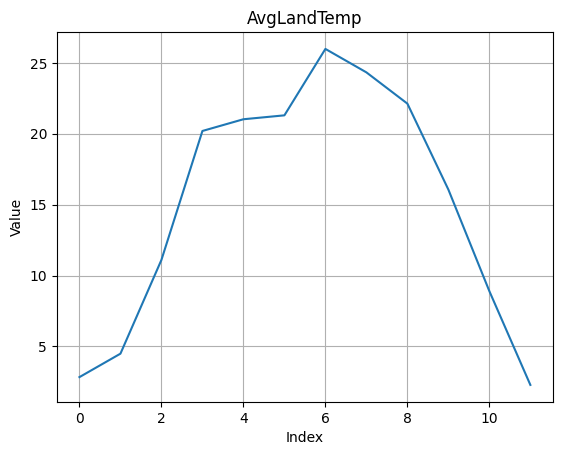

In [10]:
# Creating Datacube
datacube1 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2014-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube1 = datacube1.slice(subset)
data_bytes = slice_datacube1.execute()

# Decode response
data_str = data_bytes.decode('utf-8')

# Save the text output to a file
output_directory = 'outputs/'
output_filename = 'output_data.txt'
with open(output_directory + output_filename, 'w') as file:
    file.write(data_str)

# Set plot axes
y_values = [float(val) for val in data_str.split(',')]
x_values = range(len(y_values))

# Plot using Matplot
plt.plot(x_values, y_values)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title(f'{slice_datacube1.coverage_id}')
plt.grid(True)
plt.show()

### Example 3: 3D -> 2D Subset

This example shows the creation of a third datacube. This datacube uses a similar coverage and encoding as the first one, but an alternative method of obtaining information is used (the .get() method). The rest of the methods for Matplot remain the same.

In [ ]:
datacube2 = Datacube(con, coverage_id='AvgTemperatureColorScaled', encode='image/png')
datat1 = datacube2.get('2014-07')
Image(datat1)
# Convert the image data to a format compatible with Matplotlib
image = plt.imread(io.BytesIO(datat1))
# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis
plt.show()

# Save image to a file in the specified directory
output_directory = 'outputs/'
plt.imsave(output_directory + 'output_image2.png', image)

### Example 4: DataCube Modification

This example modifies an existing datacube instead of creating a new one. The same coverage is used, but a different set of information is requested and displayed.

In [ ]:
# Modifying functionalities of datacube2
modify_ans1 = {"ansi": "2000-02-01"}
subset_dc = datacube2.slice(modify_ans1)
data1 = subset_dc.execute()
Image(data1)
image1 = plt.imread(io.BytesIO(data1))

# Display the image using Matplotlib
plt.imshow(image1)
plt.axis('off') # Optional: Turn off axis
plt.show()

# Save image to a file in the specified directory
output_directory = 'outputs/'
plt.imsave(output_directory + 'output_image3.png', image1)

### Example 5: Invalid Query

In [ ]:
# The server cannot cover this range 
datacube1 = Datacube(con, coverage_id='AvgLandTemp', encode='text/csv')
subset = {"ansi": ("2014-01", "2016-12"), "Lat": (53.08), "Lon": (8.80)}
slice_datacube1 = datacube1.slice(subset)
data_bytes = slice_datacube1.execute()
data_str = data_bytes.decode('utf-8')
y_values = [float(val) for val in data_str.split(',')]

x_values = range(len(y_values))

## Conclusion

This concludes the walkthrough of the library's features so far. For complimentary documentation and information, please consult the README file.